# АНАЛИЗ ГИПОТЕЗ

## **Задачи проекта**

Как аналитик крупного интернет-магазина необходимо проанализировать выдвинутые вместе с отделом маркетинга гипотезы для увеличения выручки.

В первой части проекта изучим выдвинутые гипотезы и приоритизируем гипотезы методами ICE и RICE, состоящих из 3х (и в случае RICE 4х) компонентов: 
Reach — скольких пользователей затронет изменение, которое хотим внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу.

Во второй части проекта изучим таблицы с результатами проведенного A/B-теста. Таблица с заказами 'orders' и таблица с пользователями 'visitors' с указанием групп A/B-теста. Оценим результаты A/B-теста визуально и выясним, есть ли в данных выбросы.
Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

## **Часть 1. Приоритизация гипотез**

Изучим данные в таблице 'hypothesis' с 9-ю выдвинутыми гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### **Изучение данных**

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

### **Фреймворк ICE для приоритизации гипотез**

In [7]:
#Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовем ICE.
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']

In [8]:
#Выведем столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.
data.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


***ВЫВОД:***

Наиболее перспективные гипотезы по ICE: 
- Запустить акцию, дающую скидку на товар в день рождения (8),
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7).

### **Фреймворк RICE для приоритизации гипотез**

In [9]:
#Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице. Новый столбец назовем RICE.
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

In [10]:
#Выведем из получившейся таблицы столбцы 'hypothesis' и 'RICE', отсортированные по столбцу 'RICE'.
data.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### **Итоговая таблица**

In [11]:
data.sort_values(by='reach', ascending=False)[['hypothesis', 'reach', 'ICE', 'RICE']]

,hypothesis,reach,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.125000,9.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.000000,40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.333333,40.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,1.333333,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2.000000,4.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.200000,16.2


***ВЫВОД:***

И снова мы видим те же гипотезы, что были ранее, но в другом порядке. 
Гипотеза 'Запустить акцию, дающую скидку на товар в день рождения' (8) уже не имеет первенства. 

На первом месте:
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' (7), т.к. ее охват (REACH) равен 10, максимально из всех, в то время как у гипотезы 'Запустить акцию, дающую скидку на товар в день рождения' (8) охват (REACH) всего 1, самый низкий.

Наиболее перспективные гипотезы по RICE: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), 
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2), 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), 
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6).

## **Часть 2. Анализ A/B-теста**

Изучим 2 полученные таблицы с результатами пройденного A/B-теста. Таблица с заказами 'orders' и  таблица с пользователями 'visitors' с указанием групп A/B-теста.

### **Изучение данных**

In [12]:
#Прочтём данные из файлов с результатами A/B-тестирования
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [13]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [15]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [17]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [18]:
orders['date'].max()

'2019-08-31'

In [19]:
orders['date'].min()

'2019-08-01'

In [20]:
visitors['date'].max()

'2019-08-31'

In [21]:
visitors['date'].min()

'2019-08-01'

In [22]:
visitors.groupby('group', as_index=False).agg({'visitors': 'sum'})

,group,visitors
0,A,18736
1,B,18916


In [23]:
orders.groupby('group', as_index=False).agg({'visitorId': 'nunique', 'visitorId': 'count'})

,group,visitorId
0,A,557
1,B,640


In [24]:
df = orders[['group', 'visitorId']].groupby(['group', 'visitorId'], as_index=False).agg({'group':'count'})
df[df.duplicated('visitorId')].count()

visitorId    58
group        58
dtype: int64

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

#Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


### **График кумулятивной выручки по группам**

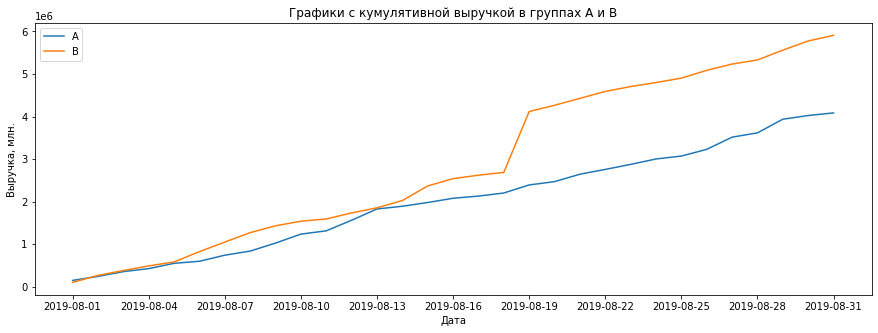

In [26]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(cumulativeRevenueA['date'][::3])
plt.ylabel('Выручка, млн.')
plt.xlabel('Дата')
plt.title('Графики с кумулятивной выручкой в группах A и B')
plt.legend()

***ВЫВОД:***

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки группы В в одной точке резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### **График кумулятивного среднего чека по группам**

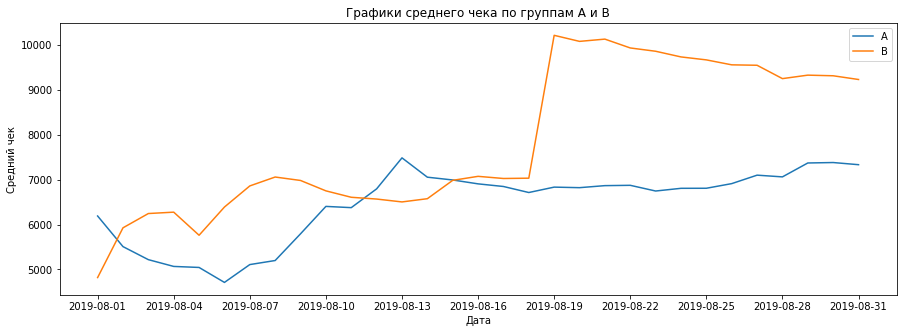

In [27]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(cumulativeRevenueA['date'][::3])
plt.xticks(cumulativeRevenueA['date'][::3])
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Графики среднего чека по группам A и B')
plt.legend() 

***ВЫВОД:***

Средний чек в группе А становится равномерным ближе к концу теста. Для группы В в одной точке был сильный рост, после становится равномерным ближе к концу теста. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### **График относительного изменения кумулятивного среднего чека группы B к группе A**

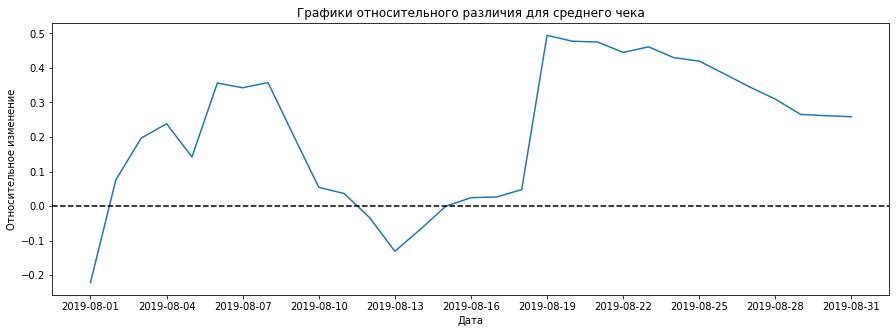

In [28]:
#Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline()
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(cumulativeRevenueA['date'][::3])
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.title('Графики относительного различия для среднего чека')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

***ВЫВОД:***

В нескольких точках график различия между сегментами резко «скачет». Видимо, дело в крупных заказах и выбросах.

### **График кумулятивного среднего количества заказов на посетителя по группам**

(0.0, 30.0, 0.0, 0.05)

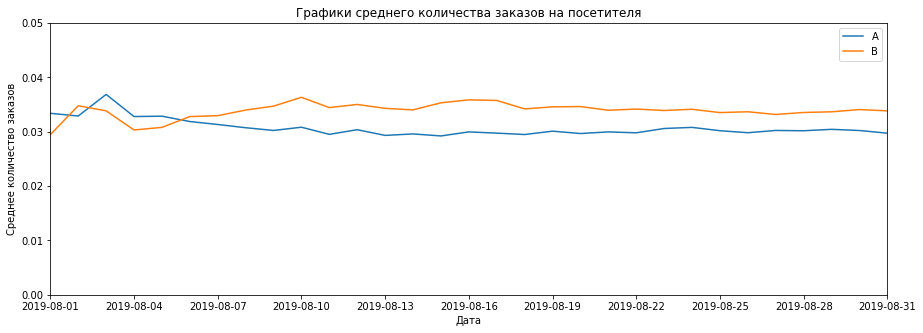

In [29]:
#Аналогично проанализируем график среднего количества заказов на посетителя. Зададим масштаб осей методом plt.axis(). 
#Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0, 0.05]
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(cumulativeRevenueA['date'][::3])
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
plt.title('Графики среднего количества заказов на посетителя')

plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 

***ВЫВОДЫ:***
Среднее количество заказов остается примерно равномерным на протяжении всего времени. 

### **График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

(0.0, 30.0, -0.6, 0.6)

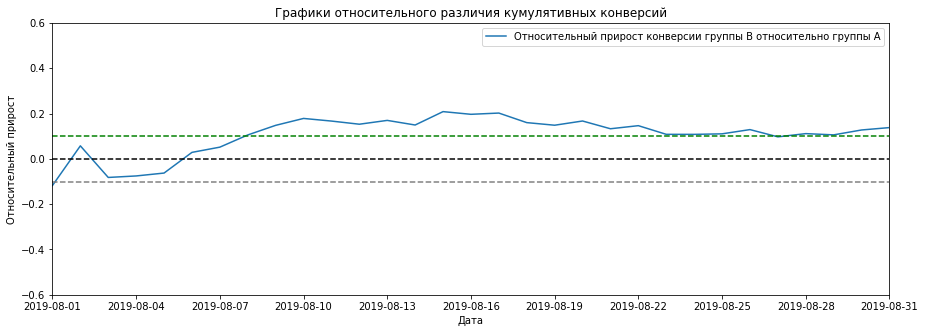

In [30]:
#Построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(cumulativeRevenueA['date'][::3])
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')
plt.title('Графики относительного различия кумулятивных конверсий')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) 

***ВЫВОД:***

Группа B лидирует по конверсии. 
Также стоит проанализировать аномалии, возможно, они изменят картину.

### **Точечный график количества заказов по пользователям**

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


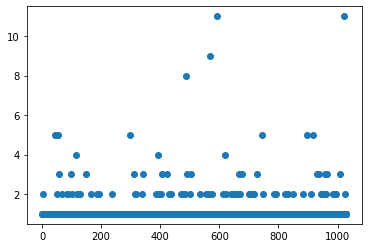

In [31]:
#Построим точечный график количества заказов по пользователям.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

***ВЫВОД:***

Пользователей, сделавших больше 2х заказов мало. Они могут быть аномальными. 

### **95-й и 99-й перцентили количества заказов на пользователя**

In [32]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


***ВЫВОД:***

Не более 5% пользователей совершали больше 2х заказов.
Не более 1% пользователей совершали больше 4х заказов.

### **Точечный график стоимостей заказов**

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


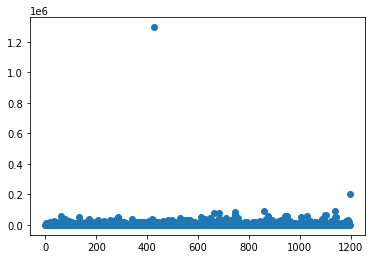

In [33]:
#Построим точечный график стоимостей заказов.
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

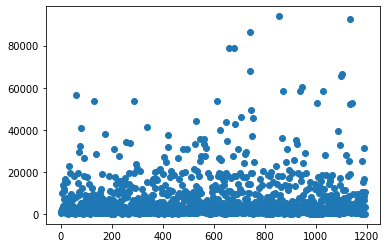

In [34]:
x_values = pd.Series(range(0, len(orders[orders['revenue'] < 100000]['revenue'])))

plt.scatter(x_values, orders[orders['revenue'] < 100000]['revenue'])

***ВЫВОД:***

Все заказы до 100 000, есть выбросы 202 410 и 1 294 500. 

### **95-й и 99-й перцентили стоимости заказов**

In [35]:
#Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

***ВЫВОД:***

Не более чем 5% заказов чек дороже 28000.
Не более чем 1% заказов чек дороже 58233,2.

### **Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

In [36]:
#Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# dataset = (
#     ordersADaily.merge(
#         ordersBDaily, left_on='date', right_on='date', how='left'
#     )
#     .merge(ordersACummulative, left_on='date', right_on='date', how='left')
#     .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
#     .merge(visitorsADaily, left_on='date', right_on='date', how='left')
#     .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
#     .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
#     .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
# )

# dataset.head()

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('oтносительный прирост среднего количества заказов на посетителя группы В к группе А', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.01679
oтносительный прирост среднего количества заказов на посетителя группы В к группе А 0.138


***ВЫВОД:***

p-value меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Анализ сырых данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.

Относительный прирост среднего группы В к группе А равен 13,8 %

### **Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [38]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие среднего чека между сегментами', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.729
относительное различие среднего чека между сегментами 0.259


***ВЫВОД:***

p-value больше 0,05 статистически значимых отличий в среднем чеке между группами нет.

относительное различие среднего чека между сегментами 25,9 %

### **Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [39]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
#ПРОШЛЫЙ ВЫВОД:Не более чем 5% заказов чек дороже 28000. Не более чем 1% заказов чек дороже 58233,2.
#ПРОШЛЫЙ ВЫВОД:Не более 5% пользователей совершали больше 2х заказов. Не более 1% пользователей совершали больше 4х заказов.
#Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


***ВЫВОД:***

74 аномальных пользователя.

In [41]:
#Узнаем, как их действия повлияли на результаты теста. 
#Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный показатель между группами', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.013
относительный показатель между группами 0.173


<div id='link'></div>

***ВЫВОД:***

Сформулируем гипотезы.

Нулевая: статистически значимых различий в среднем количестве заказов между группами теста по очищенным данным нет.

Альтернативная: статистически значимые различия есть.

p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу отвергаем.

Результаты по среднему количеству заказов в сравнении с сырыми данными практически не изменились. Статистическая значимость достигнута. Сегмент В значительно лучше сегмента А на 17,3%. (13,8 % по сырым данным было).

### **Cтатистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [42]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


***ВЫВОД:***

P-value увеличился. p-value больше 0,05 статистически значимых отличий в среднем чеке между группами нет.

Разница между сегментами сократилась с 25% до 2 %

## **Общий вывод**

- Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий. Разница группы В над А 13,8% по сырым данным и 17,3 % по очищенным данным.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- Тест успешен. Сегмент В значительно лучше сегмента А.
- Тест можно остановить, зафиксировать победу группы В.